In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('pokemon0820.csv')
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [3]:
ddf=df.query("is_legendary == 0").query("generation == 1")
ddf['main_attack']=np.where((ddf['attack']>ddf['sp_attack']),ddf['attack'],ddf['sp_attack'])
ddf['stats_total']=ddf['main_attack']+ddf['defense']+ddf['sp_defense']+ddf['hp']+ddf['speed']
ddf['point']=0
# ddf.info()

In [4]:
ddf.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,main_attack,stats_total,point
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,65,45,grass,poison,6.9,1,0,65,269,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,80,60,grass,poison,13.0,1,0,80,343,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,120,80,grass,poison,100.0,1,0,122,525,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,50,65,fire,NaN,8.5,1,0,60,257,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,65,80,fire,NaN,19.0,1,0,80,341,0


In [5]:
items = [
    {
        'name': '小刚（岩石道馆）',
        'attrs': 'rock'
    },
    {
        'name': '小霞 （水系道馆）',
        'attrs': 'water'
    },
    {
        'name': '马志士 （电系道馆）',
        'attrs': 'electric'
    },
    {
        'name': '莉佳 （草系道馆）',
        'attrs': 'grass'
    },
    {
        'name': '阿吉&阿杏 （毒系道馆）',
        'attrs': 'poison'
    },
    {
        'name': '夏伯 （火系道馆）',
        'attrs': 'psychic'
    },
    {
        'name': '坂木 （地面道馆）',
        'attrs': 'ground'
    }  
]

In [6]:
def calucate_point(item):
    df_item = ddf.query('against_{} > 1'.format(items[0]['attrs']))
    df_item = df_item.sort_values('stats_total',ascending=False)
    index = df_item.head(6).index
    ddf.loc[index,'point']+=1

for item in items:
    calucate_point(item)

In [7]:
max(ddf['point'])

7

In [8]:
ddf=ddf.sort_values(by='point',ascending=False)
ddf.head()

team=ddf.head(6)
features=['name','attack','defense','sp_attack','sp_defense','speed','hp']
s = team[features]

pandas.core.series.Series

In [14]:
length = s.shape[0]
s.loc[length,1:] = s.aggregate('mean')
s.loc[length, 'name'] = 'avg'
s.index = s['name']

<ipython-input-14-0677248839cc>:2: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  s.loc[length,1:] = s.aggregate('mean')


In [15]:
s

,name,attack,defense,sp_attack,sp_defense,speed,hp
name,,,,,,,
Dragonite,Dragonite,134.000000,95.0,100.000000,100.000000,80.000000,91.0
Charizard,Charizard,104.000000,78.0,159.000000,115.000000,100.000000,78.0
Pinsir,Pinsir,155.000000,120.0,65.000000,90.000000,105.000000,65.0
Pidgeot,Pidgeot,80.000000,80.0,135.000000,80.000000,121.000000,83.0
Aerodactyl,Aerodactyl,135.000000,85.0,70.000000,95.000000,150.000000,80.0
Gyarados,Gyarados,155.000000,109.0,70.000000,130.000000,81.000000,95.0
avg,avg,127.166667,94.5,99.833333,101.666667,106.166667,82.0
avg,avg,127.166667,94.5,99.833333,101.666667,106.166667,82.0


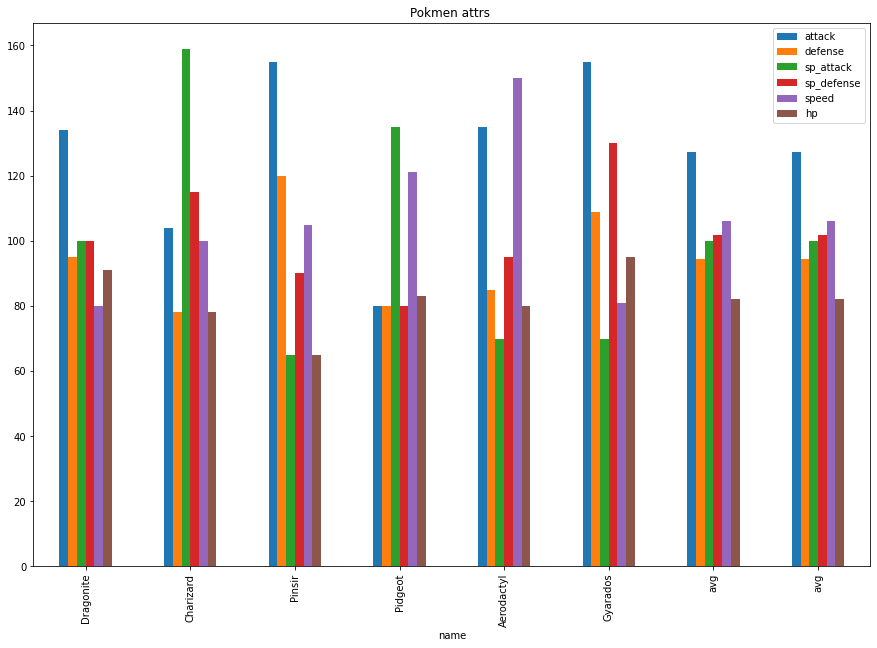

In [27]:
s.plot(kind='bar', title='Pokmen attrs ',figsize=(15,10));

In [12]:
ddf=ddf.sort_values(by='point',ascending=False)
team=ddf.head(6)
index=team.index

pokemon=team.loc[index]
pokemon[['attack','defense','sp_attack','sp_defense','speed','hp']]
for i in range(1):
    pokemon=team.loc[index[i]]
    features=['attack','defense','sp_attack','sp_defense','speed','hp']
    values=[pokemon.attack,pokemon.defense,pokemon.sp_attack,pokemon.sp_defense,pokemon.speed,pokemon.hp]
    
    
    print("values1", values)
    
    features=np.concatenate((features,[features[0]]))
    values=np.concatenate((values,[values[0]]))
    
    print("1",features)
    print("2",values)
    print("-----",pokemon)
#     ax=plt.polar(features,values)
#     plt.title(pokemon['name'])
#     plt.fill(features,values,color='blue',alpha=0.2)
#     plt.show()

values1 [134, 95, 100, 100, 80, 91]
1 ['attack' 'defense' 'sp_attack' 'sp_defense' 'speed' 'hp' 'attack']
2 [134  95 100 100  80  91 134]
----- abilities            ['Inner Focus', 'Multiscale']
against_bug                                    0.5
against_dark                                   1.0
against_dragon                                 2.0
against_electric                               1.0
against_fairy                                  2.0
against_fight                                  0.5
against_fire                                   0.5
against_flying                                 1.0
against_ghost                                  1.0
against_grass                                 0.25
against_ground                                 0.0
against_ice                                    4.0
against_normal                                 1.0
against_poison                                 1.0
against_psychic                                1.0
against_rock                            

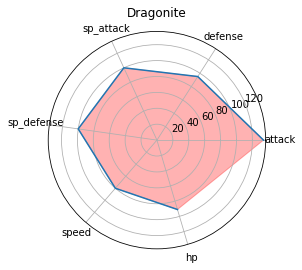

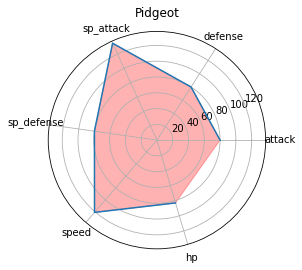

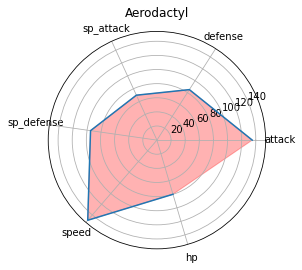

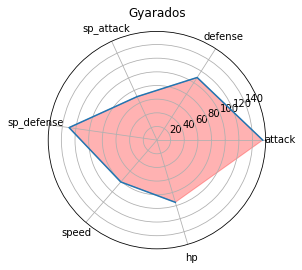

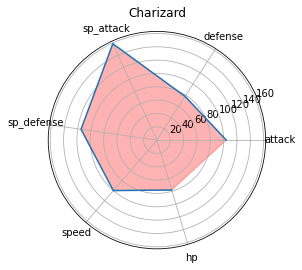

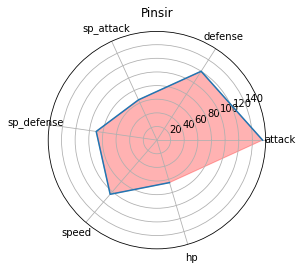

In [13]:
ddf=ddf.sort_values(by='point',ascending=False)
team=ddf.head(6)
index=team.index
for i in range(6):
    pokemon=team.loc[index[i]]
    features=['attack','defense','sp_attack','sp_defense','speed','hp']
    values=[pokemon.attack,pokemon.defense,pokemon.sp_attack,pokemon.sp_defense,pokemon.speed,pokemon.hp]
    ax=plt.polar(features,values)
    plt.title(pokemon['name'])
    plt.fill(features,values,color='red',alpha=0.3)
    plt.show()